In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
# from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [2]:
df = pd.read_csv('sample_walmart_retail_dataset.csv')

In [3]:
df.head(5)

,order_id,order_date,order_priority,ship_date,ship_mode,customer_id,customer_age,customer_segment,country,city,...,region,product_id,product_category,product_sub_category,product_name,sales,unit_price,order_quantity,discount,profit
0,ddb2de3d-ded3-4715-97cf-69becc54d95a,16-03-2022,Low,18-03-2022,Express Air,a2b28c3f,59,Corporate,United States,Bullhead City,...,West,eeb8cd3f,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,839.07,279.81,3,0.12,8584.44253
1,c4d92cf0-fee8-41e8-904d-b132eb429e24,26-09-2019,Critical,01-10-2019,Delivery Truck,0375660f,73,Consumer,United States,Grand Island,...,Central,f235a01b,Technology,Copiers and Fax,Canon PC1080F Personal Copier,25791.40,599.99,43,0.19,14583.60689
2,cc09b9ad-a17d-42bf-835e-d35cc66e30f9,10-09-2022,High,15-09-2022,Delivery Truck,fb823f3d,43,Home Office,United States,Georgetown,...,Central,44f572ea,Technology,Computer Peripherals,Gyration Ultra Cordless Optical Suite,1108.47,100.97,11,0.20,12245.47225
3,7c955c6b-ca70-4b97-a9f8-a38af866b506,10-02-2022,Critical,11-02-2022,Regular Air,17771651,30,Consumer,United States,Dix Hills,...,East,e56df987,Furniture,Tables,Hon Rectangular Conference Tables,1365.18,227.55,6,0.02,-8526.40009
4,8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a,02-11-2020,Not Specified,04-11-2020,Regular Air,8e721b69,44,Small Business,United States,Harker Heights,...,Central,20018a8c,Furniture,Tables,Balt Split Level Computer Training Table,3189.41,138.75,23,0.08,9616.03084


In [4]:
df.describe()

,customer_age,zip_code,sales,unit_price,order_quantity,discount,profit
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,55.030840,60390.05960,2350.985374,93.491543,25.516640,0.124728,6534.490505
std,20.247533,23585.65073,8506.681891,316.679417,14.056834,0.071978,11981.938327
min,20.000000,10528.00000,1.340000,0.990000,1.000000,0.000000,-14139.737950
25%,37.000000,43026.00000,135.990000,6.480000,14.000000,0.060000,-3884.329935
50%,55.000000,60148.00000,444.620000,21.780000,25.000000,0.120000,6492.884945
75%,73.000000,78641.00000,1784.387500,80.980000,38.000000,0.190000,16922.009975
max,90.000000,99362.00000,312012.940000,6783.020000,50.000000,0.250000,27219.848000


In [5]:
df.shape

(25000, 22)

In [6]:
df.columns

Index(['order_id', 'order_date', 'order_priority', 'ship_date', 'ship_mode',
       'customer_id', 'customer_age', 'customer_segment', 'country', 'city',
       'state', 'zip_code', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'unit_price',
       'order_quantity', 'discount', 'profit'],
      dtype='object')

In [7]:
df.isnull().any().sum()

0

# Top Products which are bought

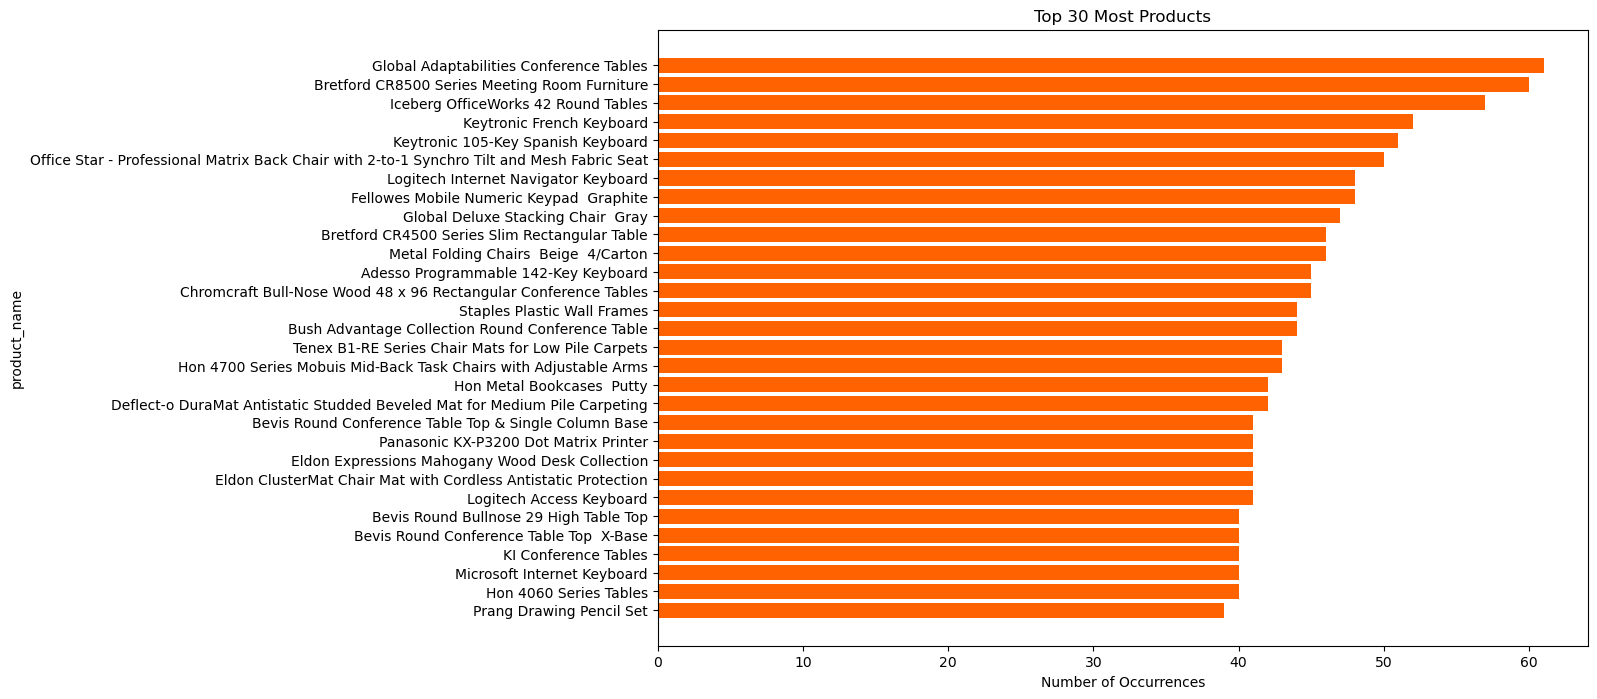

In [8]:
description_counts = df['product_name'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('product_name')
plt.title('Top 30 Most Products')

# Show the plot
plt.show()

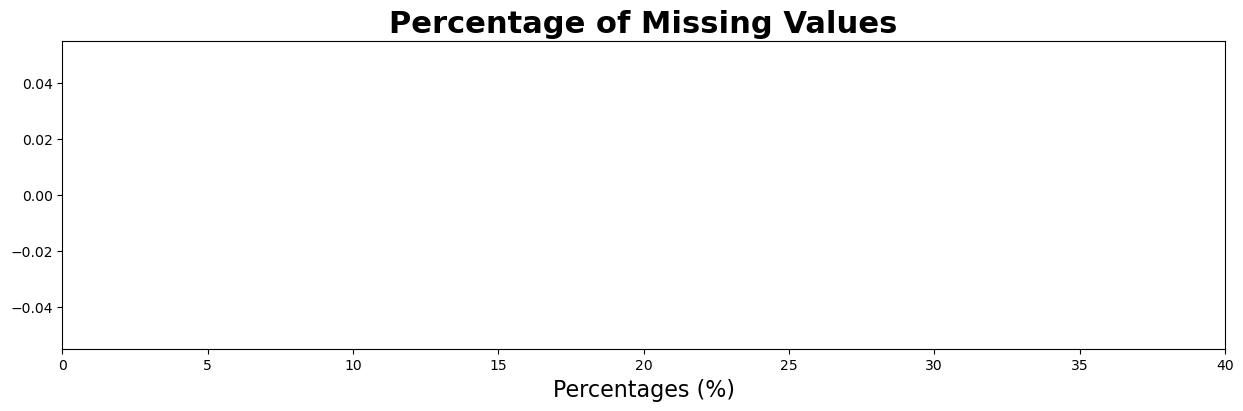

In [9]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [10]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.head(5)

,order_id,order_date,order_priority,ship_date,ship_mode,customer_id,customer_age,customer_segment,country,city,...,region,product_id,product_category,product_sub_category,product_name,sales,unit_price,order_quantity,discount,profit


In [11]:
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 0 duplicate rows that need to be removed.


In [12]:
df['unit_price'].describe()

count    25000.000000
mean        93.491543
std        316.679417
min          0.990000
25%          6.480000
50%         21.780000
75%         80.980000
max       6783.020000
Name: unit_price, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              25000 non-null  object 
 1   order_date            25000 non-null  object 
 2   order_priority        25000 non-null  object 
 3   ship_date             25000 non-null  object 
 4   ship_mode             25000 non-null  object 
 5   customer_id           25000 non-null  object 
 6   customer_age          25000 non-null  int64  
 7   customer_segment      25000 non-null  object 
 8   country               25000 non-null  object 
 9   city                  25000 non-null  object 
 10  state                 25000 non-null  object 
 11  zip_code              25000 non-null  int64  
 12  region                25000 non-null  object 
 13  product_id            25000 non-null  object 
 14  product_category      25000 non-null  object 
 15  product_sub_categor

<Axes: >

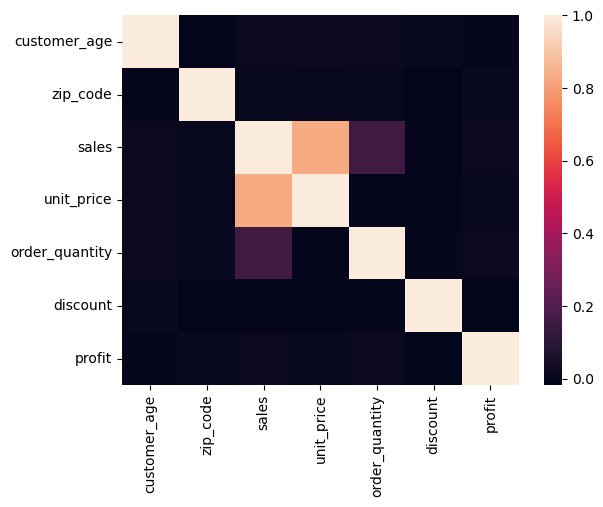

In [14]:
sns.heatmap(df.corr(numeric_only=True))

# Feature Engineering

In [15]:
# Select only the important columns
selected_columns = ['customer_id', 'order_id', 'order_date', 'sales', 'order_quantity', 
                    'discount', 'profit', 'product_category', 'product_sub_category', 
                    'product_name', 'country', 'city', 'state', 'region']

# Create a new DataFrame with selected columns
selected_df = df[selected_columns].copy()

# Check for missing values
print(selected_df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:", selected_df.duplicated().sum())

# Convert 'order_date' to datetime format
selected_df['order_date'] = pd.to_datetime(selected_df['order_date'])

# Feature engineering: Extract year and month from 'order_date'
selected_df['order_year'] = selected_df['order_date'].dt.year
selected_df['order_month'] = selected_df['order_date'].dt.month

# Calculate total purchase amount (sales * order_quantity)
selected_df['total_purchase_amount'] = selected_df['sales'] * selected_df['order_quantity']

# Drop unnecessary columns
selected_df.drop(columns=['order_date'], inplace=True)

# Check the updated DataFrame
selected_df.head()



customer_id             0
order_id                0
order_date              0
sales                   0
order_quantity          0
discount                0
profit                  0
product_category        0
product_sub_category    0
product_name            0
country                 0
city                    0
state                   0
region                  0
dtype: int64
Duplicate rows: 0


,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,city,state,region,order_year,order_month,total_purchase_amount
0,a2b28c3f,ddb2de3d-ded3-4715-97cf-69becc54d95a,839.07,3,0.12,8584.44253,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,United States,Bullhead City,Arizona,West,2022,3,2517.21
1,0375660f,c4d92cf0-fee8-41e8-904d-b132eb429e24,25791.40,43,0.19,14583.60689,Technology,Copiers and Fax,Canon PC1080F Personal Copier,United States,Grand Island,Nebraska,Central,2019,9,1109030.20
2,fb823f3d,cc09b9ad-a17d-42bf-835e-d35cc66e30f9,1108.47,11,0.20,12245.47225,Technology,Computer Peripherals,Gyration Ultra Cordless Optical Suite,United States,Georgetown,Texas,Central,2022,9,12193.17
3,17771651,7c955c6b-ca70-4b97-a9f8-a38af866b506,1365.18,6,0.02,-8526.40009,Furniture,Tables,Hon Rectangular Conference Tables,United States,Dix Hills,New York,East,2022,2,8191.08
4,8e721b69,8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a,3189.41,23,0.08,9616.03084,Furniture,Tables,Balt Split Level Computer Training Table,United States,Harker Heights,Texas,Central,2020,11,73356.43


In [16]:
import numpy as np

# Customer Lifetime: Calculate the duration between the first and last purchase
customer_lifetime = selected_df.groupby('customer_id')['order_year'].agg(lambda x: x.max() - x.min())
selected_df['customer_lifetime'] = selected_df['customer_id'].map(customer_lifetime)

# Average Sales per Order
selected_df['avg_sales_per_order'] = selected_df['total_purchase_amount'] / selected_df['order_id'].nunique()

# Order Frequency
order_frequency = selected_df.groupby('customer_id')['order_id'].nunique()
selected_df['order_frequency'] = selected_df['customer_id'].map(order_frequency)

# Product Diversity: Count the number of unique product categories purchased
product_diversity = selected_df.groupby('customer_id')['product_category'].nunique()
selected_df['product_diversity'] = selected_df['customer_id'].map(product_diversity)

# Geographic Distance: Calculate the distance between customer and company (dummy example)
# This example calculates a random distance between 0 and 100 for demonstration purposes
selected_df['geographic_distance'] = np.random.randint(0, 100, size=len(selected_df))

# Check the updated DataFrame
selected_df.head()


,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,...,state,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,geographic_distance
0,a2b28c3f,ddb2de3d-ded3-4715-97cf-69becc54d95a,839.07,3,0.12,8584.44253,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,United States,...,Arizona,West,2022,3,2517.21,3,0.100688,30,3,73
1,0375660f,c4d92cf0-fee8-41e8-904d-b132eb429e24,25791.40,43,0.19,14583.60689,Technology,Copiers and Fax,Canon PC1080F Personal Copier,United States,...,Nebraska,Central,2019,9,1109030.20,3,44.361208,28,3,81
2,fb823f3d,cc09b9ad-a17d-42bf-835e-d35cc66e30f9,1108.47,11,0.20,12245.47225,Technology,Computer Peripherals,Gyration Ultra Cordless Optical Suite,United States,...,Texas,Central,2022,9,12193.17,3,0.487727,22,3,4
3,17771651,7c955c6b-ca70-4b97-a9f8-a38af866b506,1365.18,6,0.02,-8526.40009,Furniture,Tables,Hon Rectangular Conference Tables,United States,...,New York,East,2022,2,8191.08,3,0.327643,47,3,31
4,8e721b69,8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a,3189.41,23,0.08,9616.03084,Furniture,Tables,Balt Split Level Computer Training Table,United States,...,Texas,Central,2020,11,73356.43,3,2.934257,32,3,72


In [17]:
selected_df.drop(columns=['geographic_distance'], inplace=True)


In [18]:
selected_df.columns

Index(['customer_id', 'order_id', 'sales', 'order_quantity', 'discount',
       'profit', 'product_category', 'product_sub_category', 'product_name',
       'country', 'city', 'state', 'region', 'order_year', 'order_month',
       'total_purchase_amount', 'customer_lifetime', 'avg_sales_per_order',
       'order_frequency', 'product_diversity'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = selected_df.select_dtypes(include=['object', 'category']).columns

# Create a copy of the DataFrame for label encoding
encoded_df = selected_df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and perform label encoding
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Check the updated DataFrame after label encoding
encoded_df.head()


,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,city,state,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,0,117,1,3,2022,3,2517.21,3,0.100688,30,3
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,0,382,20,0,2019,9,1109030.20,3,44.361208,28,3
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,0,366,33,0,2022,9,12193.17,3,0.487727,22,3
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,0,248,23,1,2022,2,8191.08,3,0.327643,47,3
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,0,413,33,0,2020,11,73356.43,3,2.934257,32,3


In [20]:
encoded_df.head()

,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,city,state,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,0,117,1,3,2022,3,2517.21,3,0.100688,30,3
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,0,382,20,0,2019,9,1109030.20,3,44.361208,28,3
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,0,366,33,0,2022,9,12193.17,3,0.487727,22,3
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,0,248,23,1,2022,2,8191.08,3,0.327643,47,3
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,0,413,33,0,2020,11,73356.43,3,2.934257,32,3


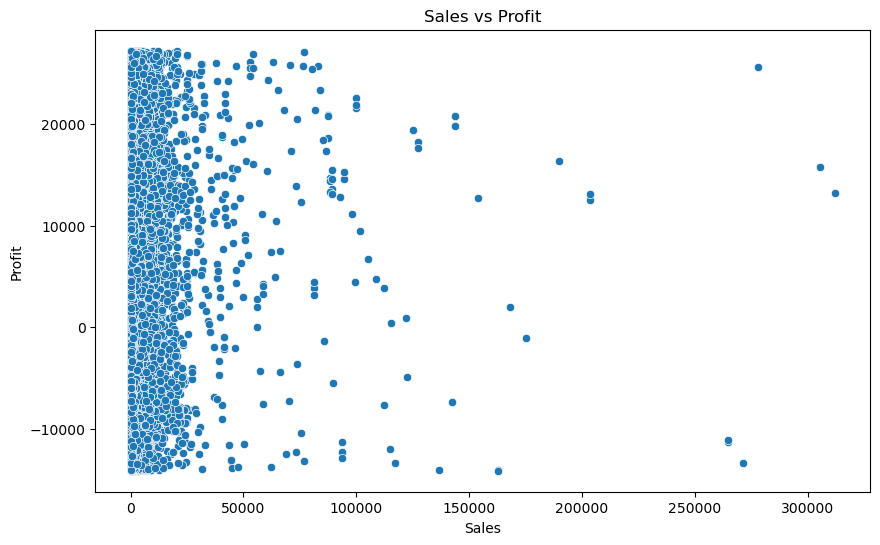

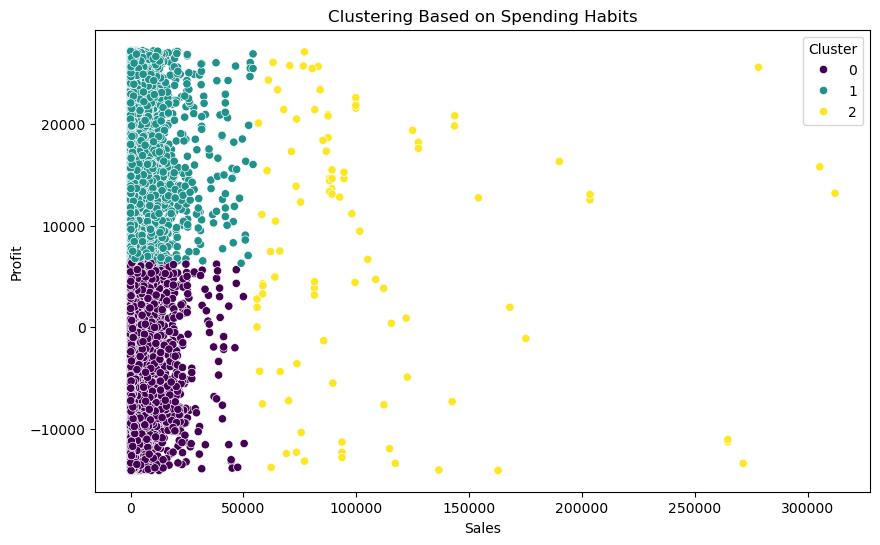

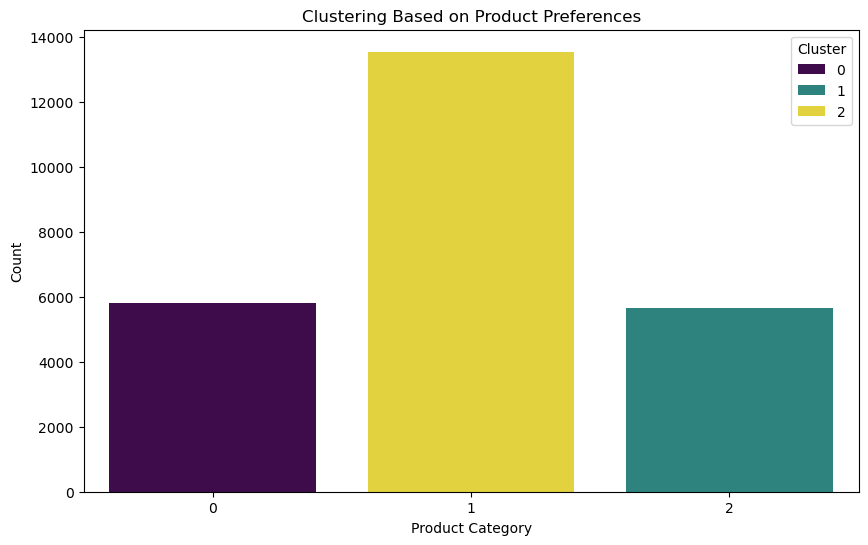

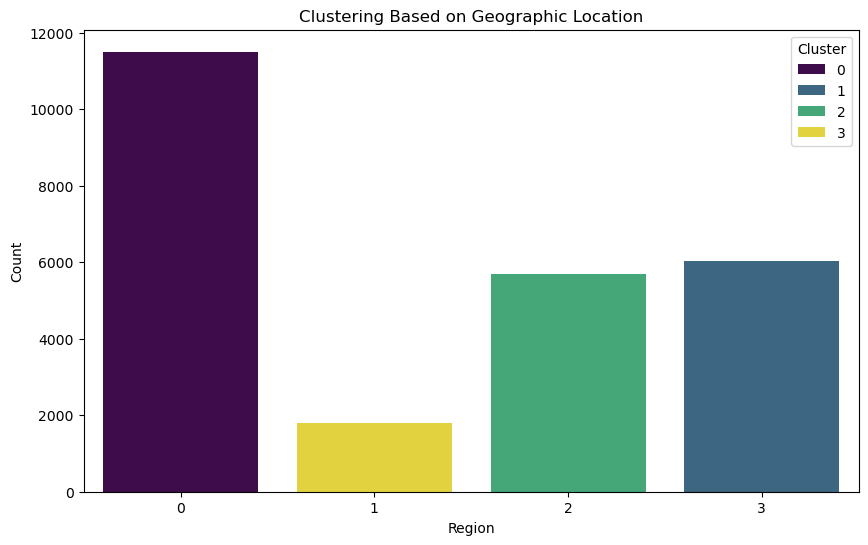

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Visualize distribution of sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=encoded_df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Perform KMeans clustering on spending habits (sales and profit)
kmeans = KMeans(n_clusters=3, random_state=42)
spending_clusters = kmeans.fit_predict(encoded_df[['sales', 'profit']])

# Visualize clusters for spending habits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', hue=spending_clusters, data=encoded_df, palette='viridis')
plt.title('Clustering Based on Spending Habits')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Cluster')
plt.show()

# Perform KMeans clustering on product preferences (example: product categories)
kmeans = KMeans(n_clusters=4, random_state=42)
product_clusters = kmeans.fit_predict(encoded_df[['product_category']])

# Visualize clusters for product preferences (product categories)
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', hue=product_clusters, data=encoded_df, palette='viridis')
plt.title('Clustering Based on Product Preferences')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

# Perform KMeans clustering on geographic location (example: regions)
kmeans = KMeans(n_clusters=5, random_state=42)
region_clusters = kmeans.fit_predict(encoded_df[['region']])

# Visualize clusters for geographic location (regions)
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue=region_clusters, data=encoded_df, palette='viridis')
plt.title('Clustering Based on Geographic Location')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['sales', 'order_quantity', 'discount', 'profit', 'customer_lifetime', 'order_frequency', 'product_diversity']

# Standardize numerical features
scaler = StandardScaler()
encoded_df_scaled = encoded_df.copy()
encoded_df_scaled[features] = scaler.fit_transform(encoded_df[features])




In [24]:
encoded_df['unique_products_purchased'] = encoded_df.groupby('customer_id')['product_name'].transform('nunique')


In [25]:
encoded_df

,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,...,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,cluster,unique_products_purchased
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,0,...,3,2022,3,2517.21,3,0.100688,30,3,1,30
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,0,...,0,2019,9,1109030.20,3,44.361208,28,3,1,28
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,0,...,0,2022,9,12193.17,3,0.487727,22,3,1,22
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,0,...,1,2022,2,8191.08,3,0.327643,47,3,0,46
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,0,...,0,2020,11,73356.43,3,2.934257,32,3,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,63,18170,78.70,2,0.13,-7235.71193,2,4,24,0,...,0,2021,5,157.40,3,0.006296,35,3,0,34
24996,642,18557,6674.88,16,0.22,-4448.45627,0,14,238,0,...,2,2021,7,106798.08,4,4.271923,46,3,2,43
24997,145,10149,96.85,13,0.14,-6014.25950,0,8,672,0,...,2,2021,11,1259.05,3,0.050362,45,3,0,41
24998,648,19897,178.80,30,0.12,9635.20843,1,11,284,0,...,2,2020,8,5364.00,3,0.214560,32,3,1,30


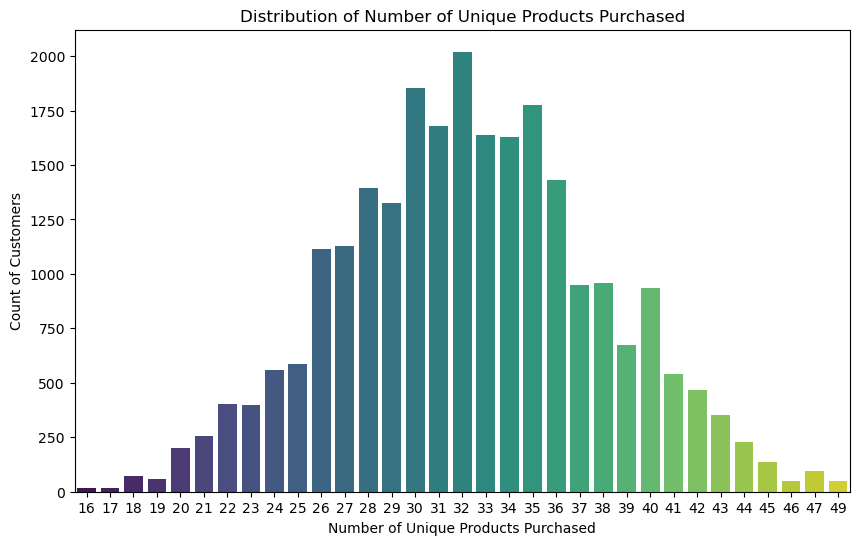

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='unique_products_purchased', data=encoded_df, palette='viridis')
plt.title('Distribution of Number of Unique Products Purchased')
plt.xlabel('Number of Unique Products Purchased')
plt.ylabel('Count of Customers')
plt.show()

In [27]:
# Group by customer_id and calculate the number of unique products purchased
unique_products_per_customer = encoded_df.groupby('customer_id')['unique_products_purchased'].first().reset_index()

# Display the customers and their corresponding number of unique products purchased
print(unique_products_per_customer)


     customer_id  unique_products_purchased
0              0                         33
1              1                         34
2              2                         27
3              3                         33
4              4                         36
..           ...                        ...
779          779                         33
780          780                         26
781          781                         26
782          782                         42
783          783                         32

[784 rows x 2 columns]


In [28]:
unique_products_per_customer.head(5)

,customer_id,unique_products_purchased
0,0,33
1,1,34
2,2,27
3,3,33
4,4,36


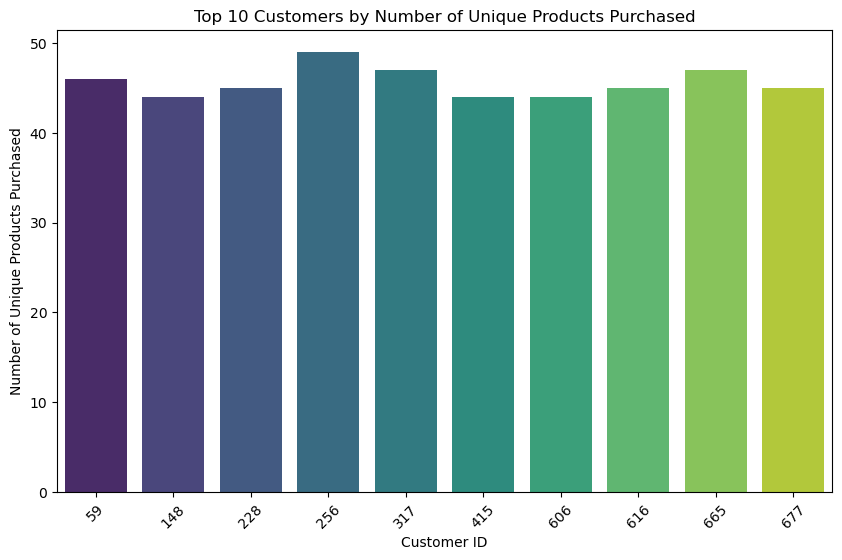

In [29]:
# Sort the DataFrame by the number of unique products purchased
sorted_unique_products_per_customer = unique_products_per_customer.sort_values(by='unique_products_purchased', ascending=False)

# Select the top 10 customers
top_10_customers = sorted_unique_products_per_customer.head(10)

# Plot the number of unique products purchased by the top 10 customers
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='unique_products_purchased', data=top_10_customers, palette='viridis')
plt.title('Top 10 Customers by Number of Unique Products Purchased')
plt.xlabel('Customer ID')
plt.ylabel('Number of Unique Products Purchased')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [30]:
import plotly.express as px

# Plot the number of unique products purchased by the top 10 customers using Plotly
fig = px.bar(top_10_customers, x='customer_id', y='unique_products_purchased', 
             labels={'customer_id': 'Customer ID', 'unique_products_purchased': 'Number of Unique Products Purchased'},
             title='Top 10 Customers by Number of Unique Products Purchased',
             color='unique_products_purchased', color_continuous_scale='viridis')

# Customize layout
fig.update_layout(
    xaxis=dict(title='Customer ID'),
    yaxis=dict(title='Number of Unique Products Purchased'),
    plot_bgcolor='rgba(255,255,255,0.5)',  # Set background color to transparent
    paper_bgcolor='rgba(255,255,255,0.5)',  # Set plot area background color to transparent
    font=dict(color='black'),  # Set font color to black
    title_font=dict(size=20),  # Set title font size
)

# Show legend
fig.update_layout(showlegend=True, legend_title_text='Number of Unique Products Purchased')

# Show plot
fig.show()


In [32]:
import plotly.express as px

# Plot the distribution using Plotly
fig = px.histogram(unique_products_per_customer, x='unique_products_purchased',
                   title='Distribution of Number of Unique Products Purchased per Customer',
                   labels={'unique_products_purchased': 'Number of Unique Products Purchased per Customer',
                           'count': 'Count of Customers'},
                   color_discrete_sequence=['#636EFA'])  # Set color palette

# Customize layout
fig.update_layout(
    xaxis=dict(title='Number of Unique Products Purchased per Customer'),
    yaxis=dict(title='Count of Customers'),
    plot_bgcolor='rgba(255,255,255,0.5)',  # Set background color to transparent
    paper_bgcolor='rgba(255,255,255,0.5)',  # Set plot area background color to transparent
    font=dict(color='black'),  # Set font color to black
    title_font=dict(size=20),  # Set title font size
)

# Show plot
fig.show()


In [33]:
encoded_df.head(5)


,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,...,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,cluster,unique_products_purchased
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,0,...,3,2022,3,2517.21,3,0.100688,30,3,1,30
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,0,...,0,2019,9,1109030.20,3,44.361208,28,3,1,28
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,0,...,0,2022,9,12193.17,3,0.487727,22,3,1,22
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,0,...,1,2022,2,8191.08,3,0.327643,47,3,0,46
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,0,...,0,2020,11,73356.43,3,2.934257,32,3,1,31


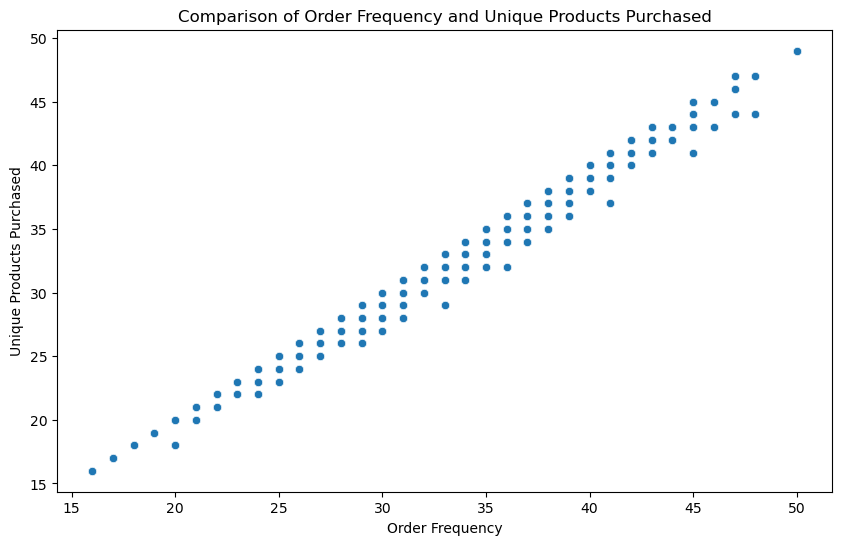

In [34]:
# Drop the 'cluster' column
encoded_df_comparison = encoded_df.drop(columns=['cluster'])

# Plot a scatter plot to compare 'order_frequency' and 'unique_products_purchased'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_frequency', y='unique_products_purchased', data=encoded_df_comparison, palette='viridis')
plt.title('Comparison of Order Frequency and Unique Products Purchased')
plt.xlabel('Order Frequency')
plt.ylabel('Unique Products Purchased')
plt.show()


In [35]:
# Select the columns for correlation analysis
columns_for_correlation = ['order_frequency', 'product_diversity', 'unique_products_purchased']

# Calculate the correlation matrix
correlation_matrix = encoded_df[columns_for_correlation].corr()

correlation_matrix


,order_frequency,product_diversity,unique_products_purchased
order_frequency,1.000000,0.060374,0.990648
product_diversity,0.060374,1.000000,0.059250
unique_products_purchased,0.990648,0.059250,1.000000


In [36]:

# Recalculate the correlation matrix
correlation_matrix = encoded_df_comparison.corr()

# Print the updated correlation matrix
print("Updated Correlation Matrix:")
correlation_matrix


Updated Correlation Matrix:


,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,...,state,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,unique_products_purchased
customer_id,1.000000,-0.009649,0.001320,0.000473,-0.000853,0.004893,0.004213,0.002957,-0.006869,NaN,...,-0.009258,0.000168,0.005348,-0.000065,0.000637,0.048798,0.000637,0.045897,-0.034250,0.046155
order_id,-0.009649,1.000000,0.004204,-0.013467,0.005248,-0.008200,-0.003763,0.000354,0.003538,NaN,...,-0.008157,0.003349,-0.000654,-0.007120,0.004254,-0.015455,0.004254,0.001645,0.012310,0.000646
sales,0.001320,0.004204,1.000000,0.150389,-0.009517,0.009058,0.095328,0.003516,-0.021257,NaN,...,0.008769,0.000055,-0.009018,0.003555,0.961949,0.003085,0.961949,-0.007412,0.005378,-0.008262
order_quantity,0.000473,-0.013467,0.150389,1.000000,-0.004767,0.010085,0.006971,0.004178,-0.002593,NaN,...,0.008529,0.001174,-0.016574,0.016623,0.202988,0.000902,0.202988,-0.005875,-0.002176,-0.005478
discount,-0.000853,0.005248,-0.009517,-0.004767,1.000000,-0.016365,-0.006110,-0.010774,-0.021161,NaN,...,0.007564,-0.011606,-0.005066,0.005563,-0.009166,0.018550,-0.009166,-0.000364,-0.001740,-0.000811
profit,0.004893,-0.008200,0.009058,0.010085,-0.016365,1.000000,0.000447,-0.006268,-0.012315,NaN,...,-0.003489,-0.000494,-0.001274,-0.002522,0.008237,-0.006206,0.008237,-0.002480,0.000931,-0.003445
product_category,0.004213,-0.003763,0.095328,0.006971,-0.006110,0.000447,1.000000,0.106164,0.101020,NaN,...,-0.002566,0.002414,0.008624,0.009658,0.080424,-0.004843,0.080424,-0.000301,0.011929,0.001411
product_sub_category,0.002957,0.000354,0.003516,0.004178,-0.010774,-0.006268,0.106164,1.000000,0.107165,NaN,...,-0.007955,-0.007431,-0.004921,-0.002220,0.002748,0.001902,0.002748,0.002832,0.004486,0.003234
product_name,-0.006869,0.003538,-0.021257,-0.002593,-0.021161,-0.012315,0.101020,0.107165,1.000000,NaN,...,0.005404,0.003329,0.010844,0.008135,-0.019887,0.008617,-0.019887,0.005356,-0.001822,0.005513
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Finding Hihgly Correlated Variables

In [37]:
# Set a threshold for correlation coefficient
threshold = 0.7

# Find pairs of highly correlated columns
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print highly correlated pairs
print("Highly Correlated Pairs:")
for pair in highly_correlated_pairs:
    print(pair)


Highly Correlated Pairs:
('sales', 'total_purchase_amount')
('sales', 'avg_sales_per_order')
('total_purchase_amount', 'avg_sales_per_order')
('order_frequency', 'unique_products_purchased')


In [38]:
encoded_df_comparison.drop(columns=['total_purchase_amount', 'avg_sales_per_order'], inplace=True)


# HyperParameters for K-means


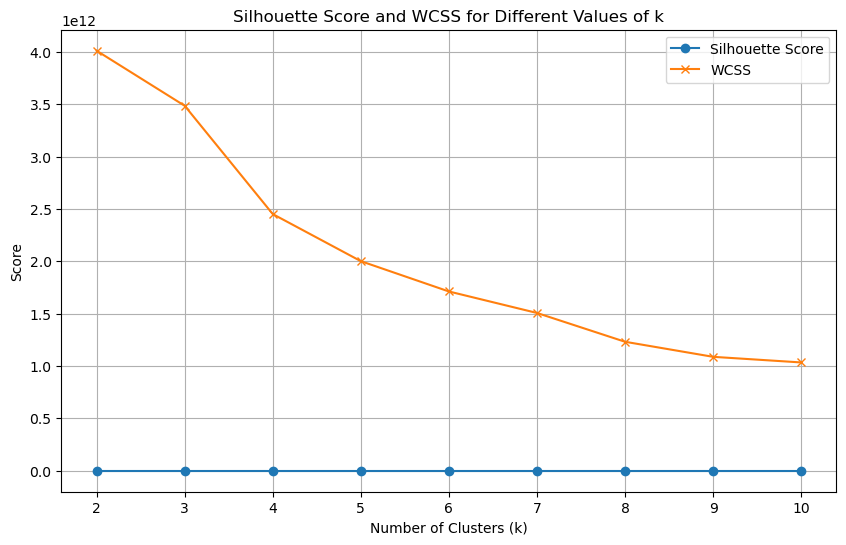

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of k values to evaluate
k_values = range(2, 11)

# Initialize lists to store silhouette scores and WCSS for each k
silhouette_scores = []
wcss_scores = []

# Perform KMeans clustering for each value of k
for k in k_values:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_df_comparison)
    
    # Calculate silhouette score
    silhouette = silhouette_score(encoded_df_comparison, kmeans.labels_)
    silhouette_scores.append(silhouette)
    
    # Calculate WCSS (inertia)
    wcss = kmeans.inertia_
    wcss_scores.append(wcss)

# Plot silhouette scores and WCSS for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_values, wcss_scores, marker='x', label='WCSS')
plt.title('Silhouette Score and WCSS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


# Adding more Features 
<b>Average Days Between Purchases: </b> This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions. <br>
<b>Favorite Shopping Day</b>: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week. <br>
<b>Favorite Shopping Hour: </b> This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

In [40]:
df.columns

Index(['order_id', 'order_date', 'order_priority', 'ship_date', 'ship_mode',
       'customer_id', 'customer_age', 'customer_segment', 'country', 'city',
       'state', 'zip_code', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'unit_price',
       'order_quantity', 'discount', 'profit'],
      dtype='object')

In [41]:
encoded_df.head(5)

,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,...,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,cluster,unique_products_purchased
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,0,...,3,2022,3,2517.21,3,0.100688,30,3,1,30
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,0,...,0,2019,9,1109030.20,3,44.361208,28,3,1,28
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,0,...,0,2022,9,12193.17,3,0.487727,22,3,1,22
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,0,...,1,2022,2,8191.08,3,0.327643,47,3,0,46
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,0,...,0,2020,11,73356.43,3,2.934257,32,3,1,31


In [42]:
import pandas as pd

# Convert 'order_date' to datetime with the appropriate format
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

# Calculate time difference between consecutive orders for each customer
df['time_diff'] = df.groupby('customer_id')['order_date'].diff().dt.days

# Fill missing values with 0 (for the first order of each customer)
df['time_diff'] = df['time_diff'].fillna(0)

# Calculate average days between purchases
average_days_between_purchases = df.groupby('customer_id')['time_diff'].mean()

# Calculate favorite shopping day
df['shopping_day'] = df['order_date'].dt.day_name()
favorite_shopping_day = df.groupby('customer_id')['shopping_day'].apply(lambda x: x.mode().iloc[0])

# Calculate favorite shopping hour (Not performing as per your instruction)

# Merge calculated features with encoded_df
encoded_df['average_days_between_purchases'] = average_days_between_purchases
encoded_df['favorite_shopping_day'] = favorite_shopping_day

# Fill missing values with appropriate values
encoded_df['average_days_between_purchases'].fillna(0, inplace=True)
encoded_df['favorite_shopping_day'].fillna('Unknown', inplace=True)


In [43]:
encoded_df.head(5)

,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,country,...,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,cluster,unique_products_purchased,average_days_between_purchases,favorite_shopping_day
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,0,...,3,2517.21,3,0.100688,30,3,1,30,0.0,Unknown
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,0,...,9,1109030.20,3,44.361208,28,3,1,28,0.0,Unknown
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,0,...,9,12193.17,3,0.487727,22,3,1,22,0.0,Unknown
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,0,...,2,8191.08,3,0.327643,47,3,0,46,0.0,Unknown
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,0,...,11,73356.43,3,2.934257,32,3,1,31,0.0,Unknown


In [44]:
df.head(5)

,order_id,order_date,order_priority,ship_date,ship_mode,customer_id,customer_age,customer_segment,country,city,...,product_category,product_sub_category,product_name,sales,unit_price,order_quantity,discount,profit,time_diff,shopping_day
0,ddb2de3d-ded3-4715-97cf-69becc54d95a,2022-03-16,Low,18-03-2022,Express Air,a2b28c3f,59,Corporate,United States,Bullhead City,...,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,839.07,279.81,3,0.12,8584.44253,0.0,Wednesday
1,c4d92cf0-fee8-41e8-904d-b132eb429e24,2019-09-26,Critical,01-10-2019,Delivery Truck,0375660f,73,Consumer,United States,Grand Island,...,Technology,Copiers and Fax,Canon PC1080F Personal Copier,25791.40,599.99,43,0.19,14583.60689,0.0,Thursday
2,cc09b9ad-a17d-42bf-835e-d35cc66e30f9,2022-09-10,High,15-09-2022,Delivery Truck,fb823f3d,43,Home Office,United States,Georgetown,...,Technology,Computer Peripherals,Gyration Ultra Cordless Optical Suite,1108.47,100.97,11,0.20,12245.47225,0.0,Saturday
3,7c955c6b-ca70-4b97-a9f8-a38af866b506,2022-02-10,Critical,11-02-2022,Regular Air,17771651,30,Consumer,United States,Dix Hills,...,Furniture,Tables,Hon Rectangular Conference Tables,1365.18,227.55,6,0.02,-8526.40009,0.0,Thursday
4,8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a,2020-11-02,Not Specified,04-11-2020,Regular Air,8e721b69,44,Small Business,United States,Harker Heights,...,Furniture,Tables,Balt Split Level Computer Training Table,3189.41,138.75,23,0.08,9616.03084,0.0,Monday


In [45]:
import pandas as pd

# Group by 'customer_id' and aggregate purchase dates into a list
purchase_dates_by_customer = df.groupby('customer_id')['order_date'].agg(list)

# Calculate average days between purchases
average_days_between_purchases = purchase_dates_by_customer.apply(lambda dates: pd.Series(dates).diff().mean())

# Calculate favorite shopping day
favorite_shopping_day = purchase_dates_by_customer.apply(lambda dates: pd.Series(dates).dt.day_name().mode().iloc[0])



In [46]:
print(purchase_dates_by_customer.shape)
purchase_dates_by_customer.head(5)

(784,)


customer_id
00039fbd    [2022-03-10 00:00:00, 2022-09-27 00:00:00, 202...
00a7fb72    [2021-04-25 00:00:00, 2020-08-29 00:00:00, 202...
00f9b723    [2021-06-14 00:00:00, 2021-06-20 00:00:00, 202...
014d7b69    [2019-06-19 00:00:00, 2021-07-27 00:00:00, 202...
0163ecd8    [2022-06-19 00:00:00, 2021-02-19 00:00:00, 201...
Name: order_date, dtype: object

In [47]:
import pandas as pd

def calculate_purchase_metrics(purchase_dates):
    # Sort the purchase dates
    sorted_dates = sorted(purchase_dates)
    
    # Calculate the differences between consecutive dates
    differences = [(sorted_dates[i + 1] - sorted_dates[i]).days for i in range(len(sorted_dates) - 1)]
    
    # Calculate the average days between purchases
    average_days_between_purchases = sum(differences) / len(differences) if differences else 0
    
    # Determine the favorite shopping day
    shopping_days = [date.day_name() for date in sorted_dates]
    favorite_shopping_day = pd.Series(shopping_days).mode().iloc[0] if shopping_days else 'Unknown'
    
    return pd.Series([average_days_between_purchases, favorite_shopping_day], index=['average_days_between_purchases', 'favorite_shopping_day'])

# Apply the function to each customer's purchase dates
purchase_metrics = purchase_dates_by_customer.apply(calculate_purchase_metrics)

# Create a new DataFrame with customer ID and calculated metrics
customer_purchase_metrics = pd.DataFrame(purchase_metrics, columns=['average_days_between_purchases', 'favorite_shopping_day']).reset_index()

# Display the new DataFrame
print(customer_purchase_metrics)


    customer_id  average_days_between_purchases favorite_shopping_day
0      00039fbd                       45.093750              Saturday
1      00a7fb72                       37.828571                Monday
2      00f9b723                       55.230769             Wednesday
3      014d7b69                       42.939394               Tuesday
4      0163ecd8                       40.885714              Saturday
..          ...                             ...                   ...
779    ff013cb5                       45.156250                Monday
780    ffb25c83                       56.920000              Saturday
781    ffbcd780                       56.280000                Monday
782    ffc72b60                       34.452381                Friday
783    ffc9084f                       42.593750                Friday

[784 rows x 3 columns]


In [48]:
customer_purchase_metrics.head(5)

,customer_id,average_days_between_purchases,favorite_shopping_day
0,00039fbd,45.093750,Saturday
1,00a7fb72,37.828571,Monday
2,00f9b723,55.230769,Wednesday
3,014d7b69,42.939394,Tuesday
4,0163ecd8,40.885714,Saturday


In [49]:
from sklearn.preprocessing import LabelEncoder

# Encode favorite_shopping_day
label_encoder = LabelEncoder()
customer_purchase_metrics['favorite_shopping_day_encoded'] = label_encoder.fit_transform(customer_purchase_metrics['favorite_shopping_day'])

# Drop the original categorical column
customer_purchase_metrics.drop(columns=['favorite_shopping_day'], inplace=True)

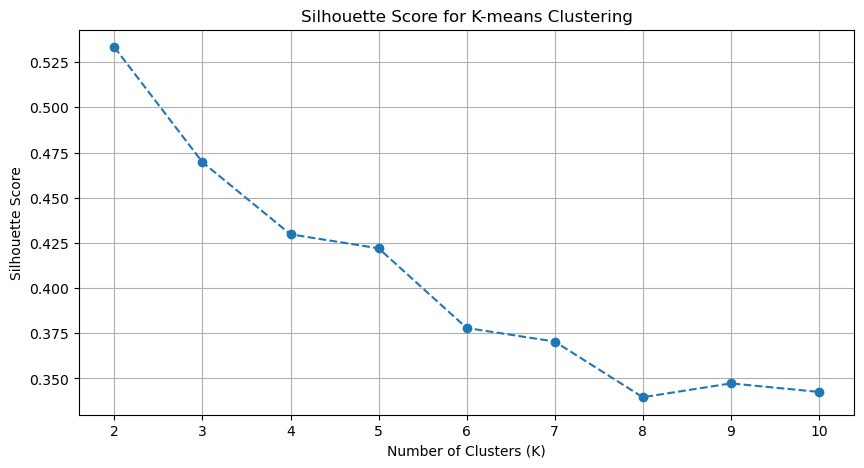

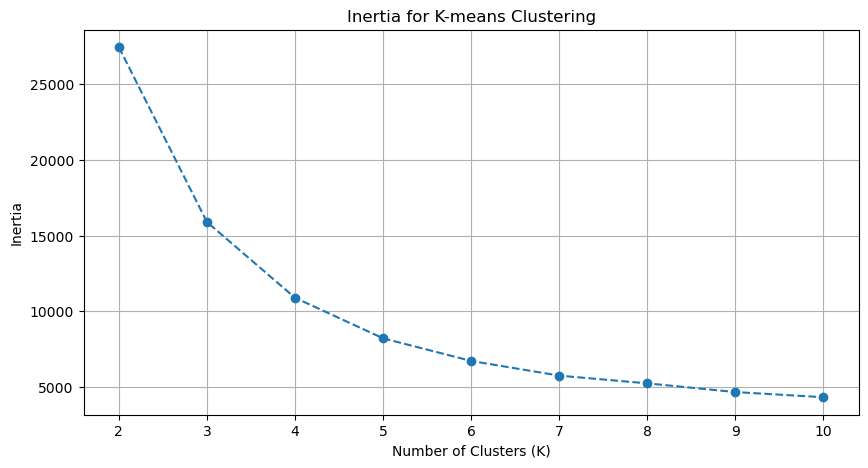

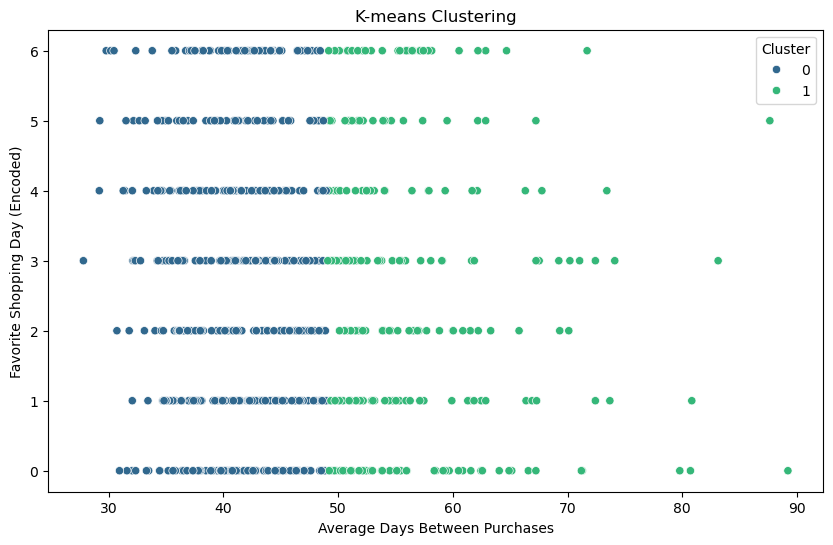

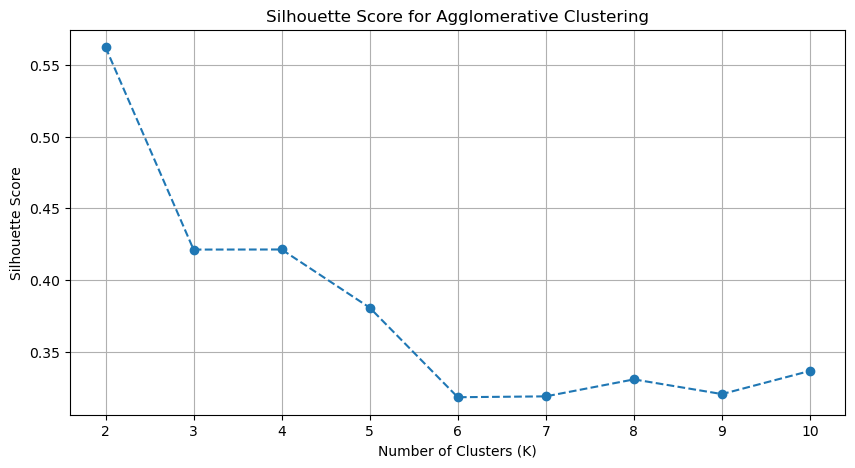

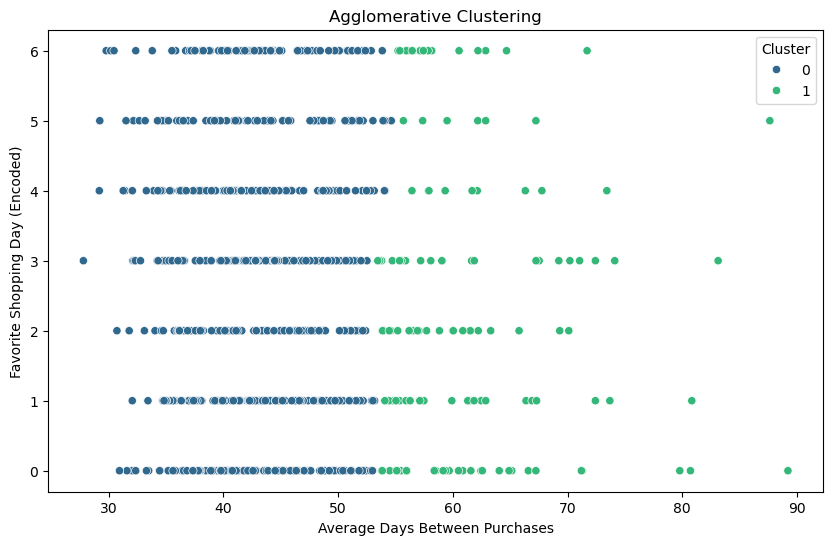

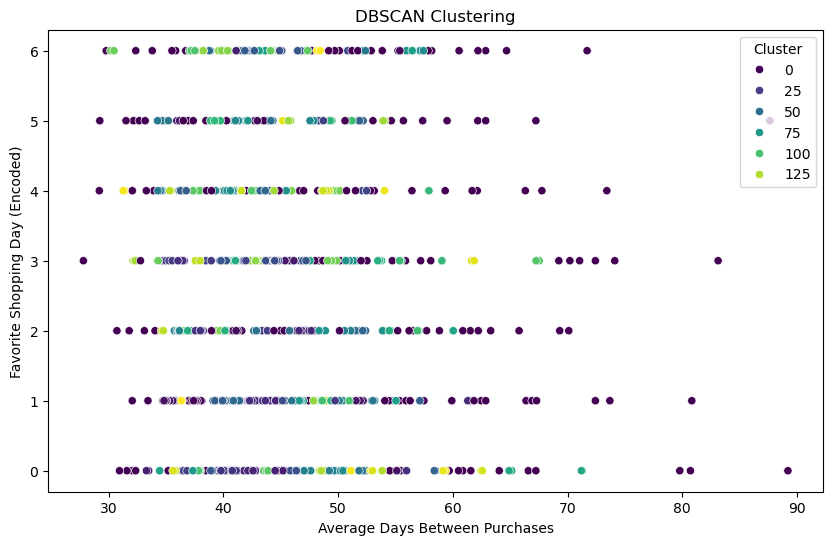

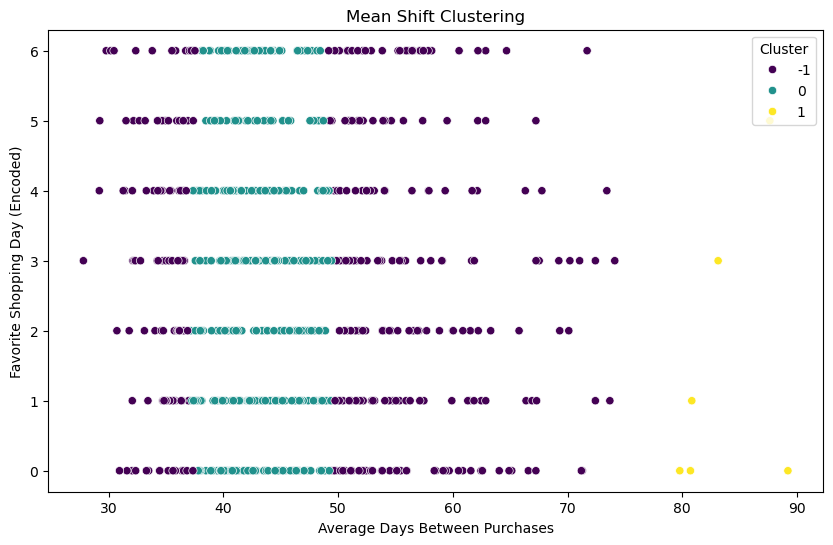

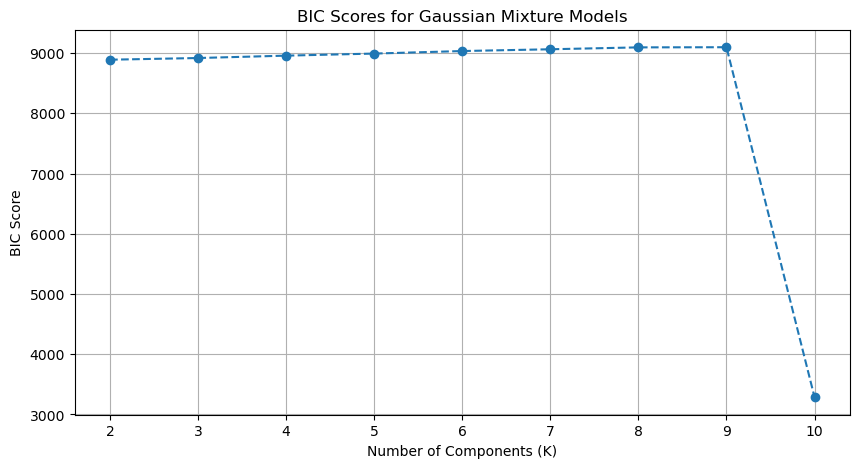

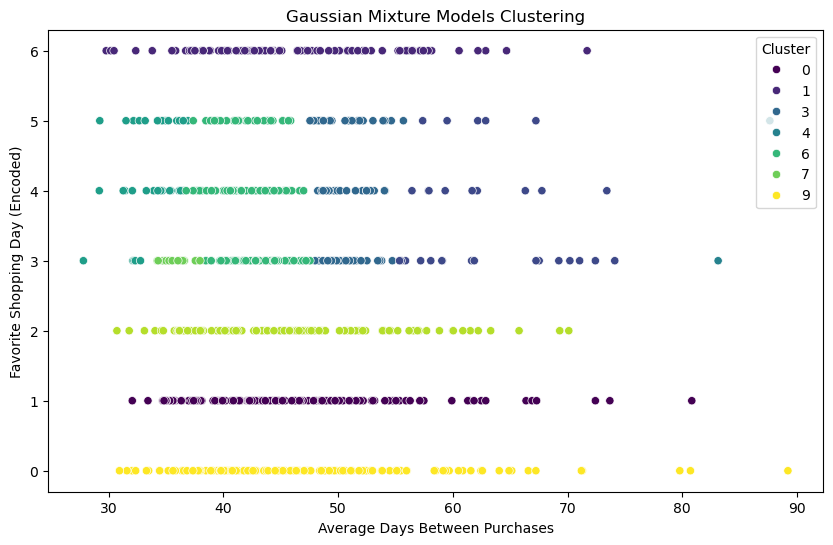

In [50]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np

# Prepare data
X = customer_purchase_metrics[['average_days_between_purchases', 'favorite_shopping_day_encoded']]

# Hyperparameter tuning for K-means
silhouette_scores = []
inertia_scores = []
max_clusters = 10  # Maximum number of clusters to try
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
    inertia_scores.append(kmeans.inertia_)

# Plot silhouette scores for K-means
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, max_clusters + 1))
plt.grid(True)
plt.show()

# Plot inertia scores for K-means
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia_scores, marker='o', linestyle='--')
plt.title('Inertia for K-means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(np.arange(2, max_clusters + 1))
plt.grid(True)
plt.show()

# Choose the best number of clusters based on silhouette score or elbow method

# Perform K-means clustering with the chosen number of clusters
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Best K based on silhouette score
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
customer_purchase_metrics['kmeans_cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_days_between_purchases', y='favorite_shopping_day_encoded', hue='kmeans_cluster', data=customer_purchase_metrics, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Favorite Shopping Day (Encoded)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Hyperparameter tuning for Agglomerative Clustering
silhouette_scores_agg = []
for k in range(2, max_clusters + 1):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    silhouette_scores_agg.append(silhouette_score(X, labels))

# Plot silhouette scores for Agglomerative Clustering
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores_agg, marker='o', linestyle='--')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, max_clusters + 1))
plt.grid(True)
plt.show()

# Choose the best number of clusters based on silhouette score

# Perform Agglomerative Clustering with the chosen number of clusters
best_k_agg = silhouette_scores_agg.index(max(silhouette_scores_agg)) + 2  # Best K based on silhouette score
agg = AgglomerativeClustering(n_clusters=best_k_agg)
customer_purchase_metrics['agg_cluster'] = agg.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_days_between_purchases', y='favorite_shopping_day_encoded', hue='agg_cluster', data=customer_purchase_metrics, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Favorite Shopping Day (Encoded)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Hyperparameter tuning for DBSCAN
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(2, 11)
best_silhouette_score_dbscan = -1
best_eps_dbscan = None
best_min_samples_dbscan = None
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:  # Check if at least 2 clusters are formed
            silhouette = silhouette_score(X, labels)
            if silhouette > best_silhouette_score_dbscan:
                best_silhouette_score_dbscan = silhouette
                best_eps_dbscan = eps
                best_min_samples_dbscan = min_samples

# Perform DBSCAN clustering with the best hyperparameters
dbscan = DBSCAN(eps=best_eps_dbscan, min_samples=best_min_samples_dbscan)
customer_purchase_metrics['dbscan_cluster'] = dbscan.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_days_between_purchases', y='favorite_shopping_day_encoded', hue='dbscan_cluster', data=customer_purchase_metrics, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Favorite Shopping Day (Encoded)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Hyperparameter tuning for Mean Shift Clustering
mean_shift = MeanShift(cluster_all=False)
labels = mean_shift.fit_predict(X)
num_clusters_mean_shift = len(np.unique(labels))
silhouette_mean_shift = silhouette_score(X, labels)

# Perform Mean Shift Clustering with the best hyperparameters
mean_shift = MeanShift(cluster_all=False)
customer_purchase_metrics['mean_shift_cluster'] = mean_shift.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_days_between_purchases', y='favorite_shopping_day_encoded', hue='mean_shift_cluster', data=customer_purchase_metrics, palette='viridis')
plt.title('Mean Shift Clustering')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Favorite Shopping Day (Encoded)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Hyperparameter tuning for Gaussian Mixture Models
bic_scores = []
for k in range(2, max_clusters + 1):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# Plot BIC scores for Gaussian Mixture Models
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), bic_scores, marker='o', linestyle='--')
plt.title('BIC Scores for Gaussian Mixture Models')
plt.xlabel('Number of Components (K)')
plt.ylabel('BIC Score')
plt.xticks(np.arange(2, max_clusters + 1))
plt.grid(True)
plt.show()

# Choose the best number of components based on BIC score

# Perform Gaussian Mixture Models clustering with the chosen number of components
best_k_gmm = bic_scores.index(min(bic_scores)) + 2  # Best K based on BIC score
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
customer_purchase_metrics['gmm_cluster'] = gmm.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_days_between_purchases', y='favorite_shopping_day_encoded', hue='gmm_cluster', data=customer_purchase_metrics, palette='viridis')
plt.title('Gaussian Mixture Models Clustering')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Favorite Shopping Day (Encoded)')
plt.legend(title='Cluster', loc='upper right')
plt.show()


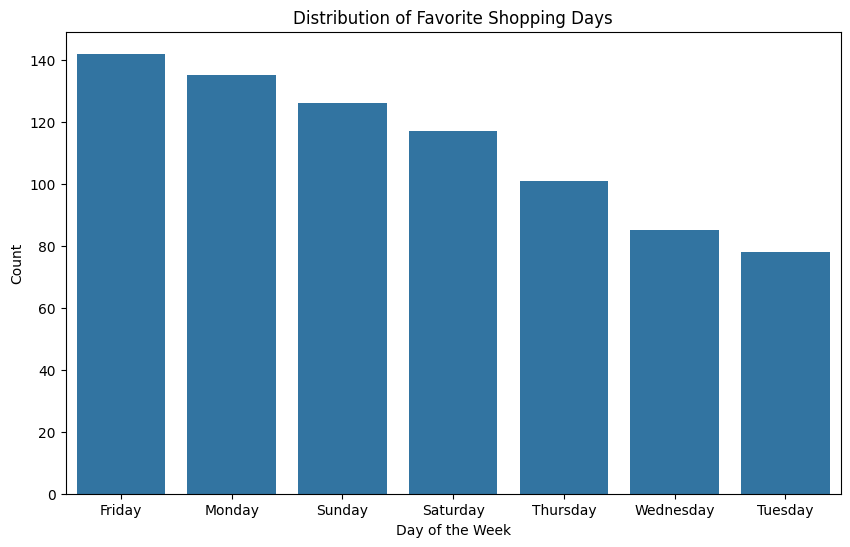

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for favorite shopping days
plt.figure(figsize=(10, 6))
sns.countplot(x='favorite_shopping_day', data=customer_purchase_metrics, order=customer_purchase_metrics['favorite_shopping_day'].value_counts().index)
plt.title('Distribution of Favorite Shopping Days')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


In [132]:
import plotly.express as px

# Define the desired order of days
desired_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Sort the data based on the desired order of days
sorted_data = customer_purchase_metrics.sort_values(by='favorite_shopping_day', key=lambda x: x.map({day: i for i, day in enumerate(desired_order)}))

# Create a histogram with Plotly
fig = px.histogram(sorted_data, x='favorite_shopping_day', color='favorite_shopping_day',
                   color_discrete_sequence=px.colors.qualitative.Set3,
                   category_orders={'favorite_shopping_day': desired_order})

# Update layout properties
fig.update_layout(title='Distribution of Favorite Shopping Days',
                  xaxis_title='Day of the Week',
                  yaxis_title='Count')

# Show the plot
fig.show()


In [117]:
encoded_df.head(5)

,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,city,...,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,cluster,unique_products_purchased,average_days_between_purchases,favorite_shopping_day,favorite_shopping_hour,unique_order_dates
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,117,...,3,0.100688,30,3,1,30,0,Unknown,-1.0,0.0
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,382,...,3,44.361208,28,3,1,28,0,Unknown,-1.0,0.0
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,366,...,3,0.487727,22,3,1,22,0,Unknown,-1.0,0.0
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,248,...,3,0.327643,47,3,0,46,0,Unknown,-1.0,0.0
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,413,...,3,2.934257,32,3,1,31,0,Unknown,-1.0,0.0


In [118]:
# Drop the specified columns from the encoded_df DataFrame
encoded_df.drop(['average_days_between_purchases', 'favorite_shopping_day', 'favorite_shopping_hour', 'unique_order_dates'], axis=1, inplace=True)


In [119]:
encoded_df.head(5)

,customer_id,order_id,sales,order_quantity,discount,profit,product_category,product_sub_category,product_name,city,...,region,order_year,order_month,total_purchase_amount,customer_lifetime,avg_sales_per_order,order_frequency,product_diversity,cluster,unique_products_purchased
0,477,21589,839.07,3,0.12,8584.44253,1,0,848,117,...,3,2022,3,2517.21,3,0.100688,30,3,1,30
1,11,19199,25791.40,43,0.19,14583.60689,2,5,267,382,...,0,2019,9,1109030.20,3,44.361208,28,3,1,28
2,770,19889,1108.47,11,0.20,12245.47225,2,4,509,366,...,0,2022,9,12193.17,3,0.487727,22,3,1,22
3,59,12090,1365.18,6,0.02,-8526.40009,0,14,562,248,...,1,2022,2,8191.08,3,0.327643,47,3,0,46
4,418,13450,3189.41,23,0.08,9616.03084,0,14,185,413,...,0,2020,11,73356.43,3,2.934257,32,3,1,31
